# Обработка данных из pathway

Загрузка библиотек и сырых данных прямо из pathway

In [ ]:
import pandas as pd
import numpy as np

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Google Meet Cardsorting.csv")
data = df
df.head()

,Answer ID,"2. Card sort, Создание отдельных комнат во время звонка","2. Card sort, Возможность дополнительной настройки отображения экранов","2. Card sort, Возможность открыть и писать заметки прямо на вкладке встречи","2. Card sort, Возможность отправлять файлы с компьютера в чат","2. Card sort, Возможность отправлять файлы с облачного хранения в чат","2. Card sort, Возможность отправлять эмоджи в чат","2. Card sort, Возможность отправлять стикеры, гифки","2. Card sort, Функция регулировки звука отдельных юзеров и всего звонка","2. Card sort, Возможность настроить экран докладчика","2. Card sort, Возможность самому вести запись видеоконференции","2. Card sort, Возможность кастомизировать сообщение","2. Card sort, Возможность ""отреагировать"" сообщение участника эмоджи","2. Card sort, Возможность ""ответить"" на отдельное сообщение другого участника и начать ветку дискуссии","2. Card sort, Возможность написать индивидуальное сообщение другому участнику конференции","2. Card sort, Возможность удалить свое сообщение","2. Card sort, Возможность отредактировать свое сообщение","Completion time, ms"
0,answer-13dp1j24lipzubh0,Максимальная релевантность! Я бы хотел увидеть...,"Нулевая релевантность. \n\nМне все равно, буде...","Нулевая релевантность. \n\nМне все равно, буде...","Нулевая релевантность. \n\nМне все равно, буде...","Средняя релевантность. \n\nЭто важно, но не та...","Нулевая релевантность. \n\nМне все равно, буде...",Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,"Средняя релевантность. \n\nЭто важно, но не та...",Низкая релевантность. \n\nБыло бы неплохо имет...,Низкая релевантность. \n\nБыло бы неплохо имет...,"Нулевая релевантность. \n\nМне все равно, буде...",Низкая релевантность. \n\nБыло бы неплохо имет...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,0
1,answer-13dp1j24lipzubyj,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,"Средняя релевантность. \n\nЭто важно, но не та...","Нулевая релевантность. \n\nМне все равно, буде...",Максимальная релевантность! Я бы хотел увидеть...,"Средняя релевантность. \n\nЭто важно, но не та...",Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,"Средняя релевантность. \n\nЭто важно, но не та...","Средняя релевантность. \n\nЭто важно, но не та...",Максимальная релевантность! Я бы хотел увидеть...,0
2,answer-13dp1j24lipzuikp,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Низкая релевантность. \n\nБыло бы неплохо имет...,Низкая релевантность. \n\nБыло бы неплохо имет...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,"Средняя релевантность. \n\nЭто важно, но не та...",Низкая релевантность. \n\nБыло бы неплохо имет...,"Средняя релевантность. \n\nЭто важно, но не та...","Средняя релевантность. \n\nЭто важно, но не та...",Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,0
3,answer-13dp1j24lipzulgr,"Средняя релевантность. \n\nЭто важно, но не та...","Нулевая релевантность. \n\nМне все равно, буде...",Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел увидеть...,Максимальная релевантность! Я бы хотел уви

## Предобработка данных

Сначала нам нужно привести данные к адекватному формату отображения в датафрейме (как в классной работе) и убрать fraud-данные

Из-за того, что кроме знакомых я также пригласил рандомных тестеров из вкладки pathway, мой эксперимент могли пройти люди незаинтересованные в качественном выполнении (с чувством, толком, расстановкой). Такие люди

### Приведение к виду как из классной работы



Приводим данные от широкого к длинному формату, а также убираем 'Completion time, ms' который даже не считался в тесте

In [ ]:
df = pd.melt(df.drop('Completion time, ms', axis=1), id_vars=['Answer ID'], var_name='card_label')

df.head()

,Answer ID,card_label,value
0,answer-13dp1j24lipzubh0,"2. Card sort, Создание отдельных комнат во вре...",Максимальная релевантность! Я бы хотел увидеть...
1,answer-13dp1j24lipzubyj,"2. Card sort, Создание отдельных комнат во вре...",Максимальная релевантность! Я бы хотел увидеть...
2,answer-13dp1j24lipzuikp,"2. Card sort, Создание отдельных комнат во вре...",Максимальная релевантность! Я бы хотел увидеть...
3,answer-13dp1j24lipzulgr,"2. Card sort, Создание отдельных комнат во вре...","Средняя релевантность. \n\nЭто важно, но не та..."
4,answer-13dp1j24lipzunkc,"2. Card sort, Создание отдельных комнат во вре...",Максимальная релевантность! Я бы хотел увидеть...


Переименовываем и смотрим, все ли окей

In [ ]:
df = df.rename(columns = {'Answer ID':'user_id', 'value': 'category_label'})
df.describe()

,user_id,card_label,category_label
count,656,656,656
unique,41,16,4
top,answer-13dp1j24lipzubh0,"2. Card sort, Создание отдельных комнат во вре...",Максимальная релевантность! Я бы хотел увидеть...
freq,16,41,312


Присваиваем IDшники к каждой карточке, категории и юзеру. Все как в лабораторной работе!

In [ ]:
# category_id, card_id
df['category_id'] = df['category_label'].astype('category').cat.codes + 1
df['card_id'] = df['card_label'].astype('category').cat.codes + 1

# пробуем функцию factorize
df['user_id'] = pd.factorize(df['user_id'])[0] + 1

df = df[['card_id', 'card_label', 'category_id', 'category_label', 'user_id']]
df

,card_id,card_label,category_id,category_label,user_id
0,15,"2. Card sort, Создание отдельных комнат во вре...",1,Максимальная релевантность! Я бы хотел увидеть...,1
1,15,"2. Card sort, Создание отдельных комнат во вре...",1,Максимальная релевантность! Я бы хотел увидеть...,2
2,15,"2. Card sort, Создание отдельных комнат во вре...",1,Максимальная релевантность! Я бы хотел увидеть...,3
3,15,"2. Card sort, Создание отдельных комнат во вре...",4,"Средняя релевантность. \n\nЭто важно, но не та...",4
4,15,"2. Card sort, Создание отдельных комнат во вре...",1,Максимальная релевантность! Я бы хотел увидеть...,5
...,...,...,...,...,...
651,12,"2. Card sort, Возможность отредактировать свое...",4,"Средняя релевантность. \n\nЭто важно, но не та...",37
652,12,"2. Card sort, Возможность отредактировать свое...",4,"Средняя релевантность. \n\nЭто важно, но не та...",38
653,12,"2. Card sort, Возможность отредактировать свое...",2,Низкая релевантность. \n\nБыло бы неплохо имет...,39
654,12,"2. Card sort, Возможность отредактировать свое...",1,Максимальная релевантность! Я бы хотел увидеть...,40


Смотрим на датасет через describe, проверяем, что все наши предыдущие шаги не сломали реальное положение дел в данных

In [ ]:
df.describe()

# все в порядке. Категорий - 4, карт - 16, пользователей - 41

,card_id,category_id,user_id
count,656.00000,656.000000,656.000000
mean,8.50000,2.147866,21.000000
std,4.61329,1.264100,11.841188
min,1.00000,1.000000,1.000000
25%,4.75000,1.000000,11.000000
50%,8.50000,2.000000,21.000000
75%,12.25000,4.000000,31.000000
max,16.00000,4.000000,41.000000


Все в порядке. Категорий - 4, карт - 16, пользователей - 41

Сортируем по user_id, переименовываем карточки для удобного отображения на графиках и просто в данных и мы готовы приступать к удалению ненадежных ответов

In [ ]:
df = df.sort_values('user_id', axis = 0).reset_index().drop('index', axis = 1)

# полностью отображаем название колонок чтобы заменить в mapping
with pd.option_context('display.max_colwidth', None):
    print(df['card_label'].unique())
    print(df['category_label'].unique())

['2. Card sort, Создание отдельных комнат во время звонка\xa0'
 '2. Card sort, Возможность кастомизировать сообщение'
 '2. Card sort, Возможность отправлять файлы с облачного хранения в чат '
 '2. Card sort, Возможность самому вести запись видеоконференции'
 '2. Card sort, Возможность удалить свое сообщение'
 '2. Card sort, Возможность написать индивидуальное сообщение другому участнику конференции'
 '2. Card sort, Возможность отправлять эмоджи в чат '
 '2. Card sort, Возможность настроить экран докладчика '
 '2. Card sort, Возможность дополнительной настройки отображения экранов'
 '2. Card sort, Возможность открыть и писать заметки прямо на вкладке встречи'
 '2. Card sort, Возможность отправлять файлы с компьютера в чат'
 '2. Card sort, Возможность отредактировать свое сообщение'
 '2. Card sort, Возможность отправлять стикеры, гифки '
 '2. Card sort, Возможность "ответить" на отдельное сообщение другого участника и начать ветку дискуссии '
 '2. Card sort, Возможность "отреагировать" с

In [ ]:
mapping_cards = {
    '2. Card sort, Создание отдельных комнат во время звонка\xa0'                                             : 'create_rooms',
    '2. Card sort, Возможность кастомизировать сообщение'                                                     : 'message_customize',
    '2. Card sort, Возможность отправлять файлы с облачного хранения в чат '                                  : 'upload_files_cloud',
    '2. Card sort, Возможность самому вести запись видеоконференции'                                          : 'record_video',
    '2. Card sort, Возможность удалить свое сообщение'                                                        : 'message_delete',
    '2. Card sort, Возможность написать индивидуальное сообщение другому участнику конференции'               : 'message_individual',
    '2. Card sort, Возможность отправлять эмоджи в чат '                                                      : 'send_emoji',
    '2. Card sort, Возможность настроить экран докладчика '                                                   : 'speaker_screen',
    '2. Card sort, Возможность дополнительной настройки отображения экранов'                                  : 'display_customize',
    '2. Card sort, Возможность открыть и писать заметки прямо на вкладке встречи'                             : 'writing_notes',
    '2. Card sort, Возможность отправлять файлы с компьютера в чат'                                           : 'upload_files_pc',
    '2. Card sort, Возможность отредактировать свое сообщение'                                                : 'message_edit',
    '2. Card sort, Возможность отправлять стикеры, гифки '                                                    : 'send_gifs',
    '2. Card sort, Возможность "ответить" на отдельное сообщение другого участника и начать ветку дискуссии ' : 'message_reply',
    '2. Card sort, Возможность "отреагировать" сообщение участника эмоджи '                                   : 'message_react',
    '2. Card sort, Функция регулировки звука отдельных юзеров и всего звонка'                                 : 'adjust_sound'
}

mapping_categories = {
    'Максимальная релевантность! Я бы хотел увидеть эту функцию как можно быстрее. НЕ БОЛЕЕ 5 КАРТ'           : 'max_importance',
    'Низкая релевантность. \n\nБыло бы неплохо иметь данные функции, но сначала надо ввести другие'           : 'low_importance',
    'Средняя релевантность. \n\nЭто важно, но не так, как самые важные функции'                               : 'middle_importance',
    'Нулевая релевантность. \n\nМне все равно, будет ли данная функция в Google Meet.'                        : 'zero_importance'
}

df['card_label'] = df['card_label'].replace(mapping_cards)
df['category_label'] = df['category_label'].replace(mapping_categories)

df.head()

,card_id,card_label,category_id,category_label,user_id
0,15,create_rooms,1,max_importance,1
1,4,message_customize,2,low_importance,1
2,10,upload_files_cloud,4,middle_importance,1
3,13,record_video,4,middle_importance,1
4,14,message_delete,1,max_importance,1


### Убираем фрод

Сначала посчитаем тех людей, которые относили карточки только к 1 или двум категориям

In [ ]:
df.groupby(['user_id'], as_index = False).agg({"category_label": "nunique"}).query('category_label <= 2').count()

user_id           6
category_label    6
dtype: int64

Таких людей - 6. Мы вполне можем отсечь их потому что задание требовало распределить функции по степени важности, все 16 функций не могут иметь равное значение для респондентов.
Вспоминая, что я привлек сторонних тестеров, чьей целью могло стоять побыстрее пройти тесты (получая за это оплату), мы убираем таковых и остаемся с 35 ответами

In [ ]:
anti_fraud = df.groupby(['user_id'], as_index = False).agg({"category_label": "nunique"}).query('category_label > 2')

df = anti_fraud.merge(df, on = 'user_id', how = 'inner', suffixes=['_uniq_number', None]).drop('category_label_uniq_number', axis = 1)
df

,user_id,card_id,card_label,category_id,category_label
0,1,15,create_rooms,1,max_importance
1,1,4,message_customize,2,low_importance
2,1,10,upload_files_cloud,4,middle_importance
3,1,13,record_video,4,middle_importance
4,1,14,message_delete,1,max_importance
...,...,...,...,...,...
555,41,7,writing_notes,2,low_importance
556,41,3,display_customize,4,middle_importance
557,41,15,create_rooms,4,middle_importance
558,41,14,message_delete,2,low_importance


Вспоминаем, что после запуска тестовой версии эксперимента весомое кол-во респондентов относительно много карточек в категорию "первостепенной важности". Поэтому в эксперименте было введено правило "не более 5 карточек в 1ую по релевантности категорию".

Посмотрим количество карточек которые относили к категории максимальной важности

In [ ]:
anti_fraud2 = df.groupby(['user_id', 'category_label'], as_index = False).agg({"category_id": "count"}).query('category_label == "max_importance"')

anti_fraud2.describe()

# видим что есть люди относившие и по 11 категорий в первостепенную важность

,user_id,category_id
count,35.000000,35.00000
mean,22.000000,6.40000
std,12.160689,2.22552
min,1.000000,3.00000
25%,12.500000,5.00000
50%,22.000000,5.00000
75%,32.500000,8.50000
max,41.000000,11.00000


Учитывая, что часть респондентов уже прошла тест без этого правила, в анализе я решил "смягчить" правило и оставить максимальное число разрешенных функций в 1 категории на уровне 7.

In [ ]:
anti_fraud2 = anti_fraud2.query('category_id < 8')[['user_id', 'category_id']]

anti_fraud2.describe()

,user_id,category_id
count,25.000000,25.000000
mean,25.040000,5.120000
std,10.921996,0.832666
min,1.000000,3.000000
25%,17.000000,5.000000
50%,24.000000,5.000000
75%,34.000000,6.000000
max,41.000000,7.000000


Итого я убрал еще 10 ответов от респондентов

В конце концов, оставил только тех, кто внимательно относился к заполнению теста и вдумчиво опроходил кардсортинг

In [ ]:
df = anti_fraud2.merge(df, on = 'user_id', how = 'inner', suffixes=['_uniq_number', None]).drop('category_id_uniq_number', axis = 1)
df

,user_id,card_id,card_label,category_id,category_label
0,1,15,create_rooms,1,max_importance
1,1,4,message_customize,2,low_importance
2,1,10,upload_files_cloud,4,middle_importance
3,1,13,record_video,4,middle_importance
4,1,14,message_delete,1,max_importance
...,...,...,...,...,...
395,41,7,writing_notes,2,low_importance
396,41,3,display_customize,4,middle_importance
397,41,15,create_rooms,4,middle_importance
398,41,14,message_delete,2,low_importance


## Анализ

### Анализ 1: карточки

Сначала посмотрим, к скольким разным категориям относили карточку

In [ ]:
df.groupby(["card_label"]).agg({"category_label": "nunique"})

# тк кардсортинг на задачу приоритезации гипотез, логично, что почти все карточки оказались в разных категориях у разных респондентов

,category_label
card_label,
adjust_sound,4
create_rooms,4
display_customize,4
message_customize,3
message_delete,4
message_edit,4
message_individual,4
message_react,4
message_reply,4


А теперь -- к каким именно и сколько раз

In [ ]:
pd.crosstab(df['card_label'],
            df['category_label'])

category_label,low_importance,max_importance,middle_importance,zero_importance
card_label,,,,
adjust_sound,4,12,7,2
create_rooms,2,12,10,1
display_customize,5,10,8,2
message_customize,10,0,5,10
message_delete,9,10,3,3
message_edit,7,9,8,1
message_individual,6,7,8,4
message_react,7,5,9,4
message_reply,3,7,13,2


Теперь посмотрим то же самое, но в процентном соотношении.
Посмотрим своего рода [**Popular Placements Matrix**](https://blog.optimalworkshop.com/how-to-interpret-your-card-sort-results-part-2-closed-card-sorts-and-next-steps/)

In [ ]:
dfPerc = pd.crosstab(df['card_label'],
            df['category_label'])

dfPerc = dfPerc[['max_importance', 'middle_importance', 'low_importance', 'zero_importance']]
dfPerc /= len(df.user_id.unique())
dfPerc *= 100
dfPerc = dfPerc.round(3)

dfPerc

category_label,max_importance,middle_importance,low_importance,zero_importance
card_label,,,,
adjust_sound,48.0,28.0,16.0,8.0
create_rooms,48.0,40.0,8.0,4.0
display_customize,40.0,32.0,20.0,8.0
message_customize,0.0,20.0,40.0,40.0
message_delete,40.0,12.0,36.0,12.0
message_edit,36.0,32.0,28.0,4.0
message_individual,28.0,32.0,24.0,16.0
message_react,20.0,36.0,28.0,16.0
message_reply,28.0,52.0,12.0,8.0


### Popular Placements Matrix

- Позволяет выяснить, какие карты были самыми популярными для размещения в категориях

С помощью этого метода я отображу 2 графика - первый, отсортированный по карточкам которые чаще размещали в блоки максимальной и средней релевантности
А второй - отсортированный по карточкам которые чаще размещали в блоки нулевой и малой релевантности

Таким образом мы выясним топ-5-6 функций высокой и низкой релевантности. Именно это и будет нашим ответом на поставленный в начале исследования вопрос: *работу над какими функциями компании следует приоритизировать и пытаться вводить в эксплуатацию в первую очередь*

In [ ]:
dfPerc.sort_values(['max_importance', 'middle_importance'], ascending = False).style.background_gradient(cmap='Greens', vmin=0, vmax=100)

category_label,max_importance,middle_importance,low_importance,zero_importance
card_label,,,,
speaker_screen,64.000000,20.000000,12.000000,4.000000
record_video,52.000000,40.000000,4.000000,4.000000
create_rooms,48.000000,40.000000,8.000000,4.000000
adjust_sound,48.000000,28.000000,16.000000,8.000000
upload_files_pc,44.000000,40.000000,8.000000,8.000000
display_customize,40.000000,32.000000,20.000000,8.000000
message_delete,40.000000,12.000000,36.000000,12.000000
message_edit,36.000000,32.000000,28.000000,4.000000
message_reply,28.000000,52.000000,12.000000,8.000000


In [ ]:
dfPerc.sort_values(['zero_importance', 'low_importance'], ascending = False).style.background_gradient(cmap='Greens', vmin=0, vmax=100)

category_label,max_importance,middle_importance,low_importance,zero_importance
card_label,,,,
message_customize,0.000000,20.000000,40.000000,40.000000
send_gifs,12.000000,24.000000,36.000000,28.000000
writing_notes,16.000000,20.000000,36.000000,28.000000
send_emoji,12.000000,36.000000,32.000000,20.000000
upload_files_cloud,24.000000,36.000000,20.000000,20.000000
message_react,20.000000,36.000000,28.000000,16.000000
message_individual,28.000000,32.000000,24.000000,16.000000
message_delete,40.000000,12.000000,36.000000,12.000000
display_customize,40.000000,32.000000,20.000000,8.000000


### Матрица совстречаемости

In [ ]:
cards = set(df.card_id)
cards

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [ ]:
n = len(cards)
similarity = np.zeros((n,n))
similarity

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
for id in set(df.user_id):
  df_ = df[df.user_id == id]
  for x in cards:
    for y in cards:
      if df_.category_id[df_.card_id == x].values[0] == df_.category_id[df_.card_id == y].values[0]:
        similarity[x-1][y-1] += 1

In [ ]:
# названия карточек
namesTable = df[["card_id","card_label"]].drop_duplicates().sort_values(by = "card_id")
namesTable

,card_id,card_label
13,1,message_reply
14,2,message_react
8,3,display_customize
1,4,message_customize
5,5,message_individual
7,6,speaker_screen
9,7,writing_notes
12,8,send_gifs
10,9,upload_files_pc
2,10,upload_files_cloud


In [ ]:
dfsim = pd.DataFrame(similarity, index = namesTable.card_label, columns = namesTable.card_label)
# dfsim /= 16
dfsim.style.background_gradient(cmap='Blues', vmin=0, vmax=25)


card_label,message_reply,message_react,display_customize,message_customize,message_individual,speaker_screen,writing_notes,send_gifs,upload_files_pc,upload_files_cloud,send_emoji,message_edit,record_video,message_delete,create_rooms,adjust_sound
card_label,,,,,,,,,,,,,,,,
message_reply,25.000000,7.000000,6.000000,3.000000,9.000000,6.000000,7.000000,7.000000,10.000000,3.000000,10.000000,7.000000,9.000000,7.000000,8.000000,8.000000
message_react,7.000000,25.000000,3.000000,8.000000,8.000000,2.000000,3.000000,5.000000,8.000000,8.000000,13.000000,7.000000,6.000000,4.000000,5.000000,5.000000
display_customize,6.000000,3.000000,25.000000,2.000000,7.000000,12.000000,6.000000,1.000000,7.000000,7.000000,2.000000,4.000000,9.000000,3.000000,13.000000,11.000000
message_customize,3.000000,8.000000,2.000000,25.000000,6.000000,2.000000,4.000000,7.000000,4.000000,3.000000,8.000000,7.000000,5.000000,9.000000,1.000000,2.000000
message_individual,9.000000,8.000000,7.000000,6.000000,25.000000,6.000000,3.000000,4.000000,6.000000,5.000000,11.000000,6.000000,7.000000,5.000000,2.000000,5.000000
speaker_screen,6.000000,2.000000,12.000000,2.000000,6.000000,25.000000,4.000000,4.000000,9.000000,7.000000,2.000000,5.000000,12.000000,6.000000,13.000000,10.000000
writing_notes,7.000000,3.000000,6.000000,4.000000,3.000000,4.000000,25.000000,7.000000,6.000000,6.000000,5.000000,4.000000,3.000000,5.000000,6.000000,5.000000
send_gifs,7.000000,5.000000,1.000000,7.000000,4.000000,4.000000,7.000000,25.000000,2.000000,7.000000,10.000000,8.000000,1.000000,8.000000,4.000000,6.000000
upload_files_pc,10.000000,8.000000,7.000000,4.000000,6.000000,9.000000,6.000000,2.000000,25.000000,7.000000,7.000000,5.000000,10.000000,9.000000,6.000000,7.000000


<Axes: xlabel='card_label', ylabel='card_label'>

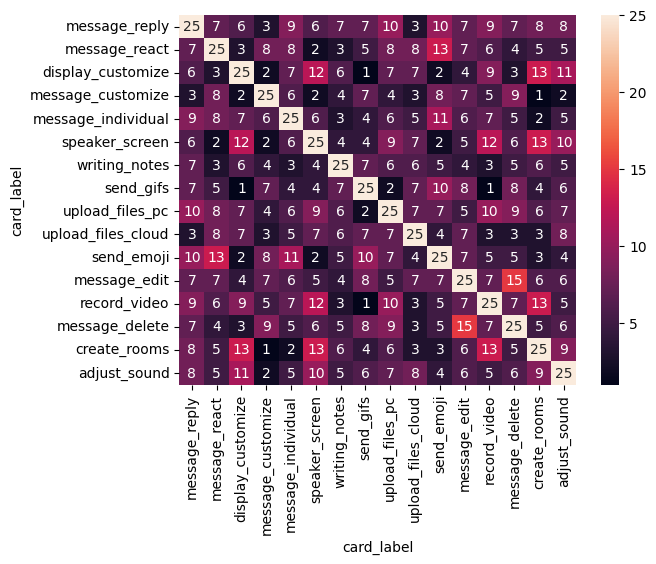

In [ ]:
import seaborn as sns
sns.heatmap(dfsim, annot=True)

### Анализ 4: кластеризация

Не первостепенная важность, но пусть будет

In [ ]:
Z = hierarchy.linkage(similarity, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z,
                          orientation = "left",
                          labels = namesTable.card_label.values)
plt.show()